In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


# __Answering the data questions__


Short explanation of the dataset: 
- __outlet_id__: The ID of a outlet/market
- __country__: The country in which the outlet is located
- __brand__: "MediaMarkt" or "Saturn"
- __customers_per_day__: The number of customers per day in this outlet 
- __sales_per_day__: The amount of sales for a specific outlet on a specific day
- __currency__: The currency of __sales_per_day__
- __week_id__: Calendar week 
- __weekday__: mon = Monday, tue = Tuesday, ... , sun = Sunday

## The data has 8 variable to be used in measuring

#### For the case study: Mediamarkt

    1. Outlet
    2. Country
    3. Brand
    4. Customer per day
    5. Sales per day
    6. Currency
    7. Week ID
    8. Weekday
    

In [1]:
import pandas as pd
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso # import Lasoo
from sklearn.linear_model import Ridge # Import Ridge

data_path = 'data.csv'
mydf = pd.read_csv(data_path, sep=';')
mydf.head(10)

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
0,MediaMarkt,spain,EURO,3138.0,100.0,34.0,sat,72169.14
1,Saturn,germany,EURO,378.0,86.0,8.0,mon,52825.62
2,MediaMarkt,italy,EURO,379.0,530.0,28.0,thu,53309.83
3,Saturn,germany,EURO,3050.0,17.0,47.0,sat,74237.45
4,MediaMarkt,spain,EURO,548.0,164.0,7.0,tue,56621.61
5,MediaMarkt,austria,EURO,1424.0,399.0,7.0,fri,59294.79
6,MediaMarkt,italy,EURO,479.0,598.0,46.0,thu,61603.64
7,MediaMarkt,austria,EURO,2028.0,342.0,36.0,sat,-999999.00
8,MediaMarkt,germany,EURO,1425.0,56.0,46.0,fri,62742.69
9,MediaMarkt,switzerland,CHF,266.0,477.0,10.0,mon,51922.36


In [2]:
#inspect the dataframe 
print(mydf.describe())
print('\n')
mydf.shape

       customers_per_day      outlet_id        week_id  sales_per_day
count       18199.000000   18194.000000   18194.000000   18193.000000
mean          259.351503    -301.265747    -852.575684   50823.378059
std         26758.789881   24590.138649   29643.403749   31283.133925
min       -999999.000000 -999999.000000 -999999.000000 -999999.000000
25%           327.000000      97.000000      14.000000   51260.450000
50%           550.000000     255.000000      27.000000   57319.920000
75%          1605.000000     530.000000      40.000000   63163.580000
max          4734.000000     698.000000      52.000000   96225.530000




(18207, 8)

In [3]:
print('These are the columns:',mydf.columns)

These are the columns: Index(['brand', 'country', 'currency', 'customers_per_day', 'outlet_id',
       'week_id', 'weekday', 'sales_per_day'],
      dtype='object')


In [8]:
print(mydf.corr()) 

                   customers_per_day  outlet_id   week_id  sales_per_day
customers_per_day           1.000000  -0.000636 -0.000901       0.015286
outlet_id                  -0.000636   1.000000 -0.000675      -0.006737
week_id                    -0.000901  -0.000675  1.000000       0.002453
sales_per_day               0.015286  -0.006737  0.002453       1.000000


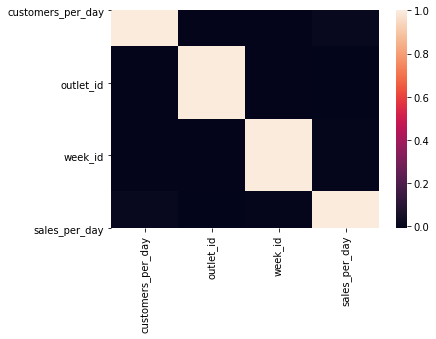

In [24]:
import seaborn as sns
corr = mydf.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [6]:
mydf.isnull()

<bound method DataFrame.isnull of             brand  country currency  customers_per_day  outlet_id  week_id  \
0      MediaMarkt    spain     EURO             3138.0      100.0     34.0   
1          Saturn  germany     EURO              378.0       86.0      8.0   
2      MediaMarkt    italy     EURO              379.0      530.0     28.0   
3          Saturn  germany     EURO             3050.0       17.0     47.0   
4      MediaMarkt    spain     EURO              548.0      164.0      7.0   
...           ...      ...      ...                ...        ...      ...   
18202  MediaMarkt   greece     EURO                0.0      255.0     21.0   
18203  MediaMarkt  germany     EURO              599.0       79.0     28.0   
18204  MediaMarkt  germany     EURO              230.0       99.0     29.0   
18205  MediaMarkt  germany     EURO              403.0       99.0     50.0   
18206  MediaMarkt  austria     EURO              595.0      334.0     45.0   

      weekday  sales_per_day 

# Experimental data

    1. I discovered that data is quantitative
    2. File format is in comma separated value (csv), separated with semicolumn

In [ ]:
import matplotlib.pyplot as plt
fig, z = plt.subplots(2, 1, figsize=(12, 8))
mydf['sales_per_day'].value_counts().sort_index().plot.bar(
    ax=z[0]
)
mydf['country'].value_counts().head(20).plot.bar(
    ax=z[1]
)

# Context - scientific and business arch

    1. Meant for scientific insigts
    2. Advise the administration on sales performance in each country and outlets 

# Conclusion

The both scientific and business questions are summaried and recorded as understood